### **Bibliotecas**


In [1]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3 MB 5.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=d8bd97df1fa48d77892e2476204daac959a9f78d11ac1d6730f0e4059f6b02fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-qaqhz8oc/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
!pip install yfinance

In [3]:
!pip install quantstats

  Created wheel for quantstats: filename=QuantStats-0.0.45-py2.py3-none-any.whl size=40165 sha256=a7d1149c695f17fc4932dea68fafcebf6fa78400cc1549f9174aea651357ea97
  Stored in directory: /root/.cache/pip/wheels/f2/b7/f5/b0d66d75ea6cebed3c31ebc7c9470c07fc17c2bb34259b0199
Successfully built quantstats


In [4]:
!pip -q install yfinance

In [5]:
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as web
import pandas as pd
import string
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pandas.util._tester import test
import pandas.testing
import pandas.arrays
import quantstats as qs
import requests
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

import urllib.request
from bs4 import BeautifulSoup

from itertools import combinations
import IPython
import cufflinks as cf
cf.go_offline()
#cf.getThemes()

## plotly
import plotly

# configurando o plotly para rodar adequadamento no google colab junto com cufflinks
plotly.io.renderers.defaut = 'colab'

In [6]:
from google.colab import files

In [7]:
qs.extend_pandas()

## **Capturando e tratando Dados**

##***Dados do site Fundamentos***

In [8]:
url = 'http://www.fundamentus.com.br/resultado.php'


In [9]:
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [10]:
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]

In [11]:
df.head(15)

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
0,MNSA4,0.47,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"-208,15%","-362,66%",3.63,"-13,50%","145,70%",0.00,-9.105000e+06,-6.52,"-41,11%"
1,IVTT3,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","-0,40%",0.00,1.083050e+09,0.00,"20,67%"
2,PORP4,2.40,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","-2,08%",0.00,2.239900e+07,0.00,"13,66%"
3,CSTB4,147.69,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"40,85%","28,98%",2.60,"22,40%","20,11%",0.00,8.420670e+09,0.14,"31,91%"
4,PMET3,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","4,10%",0.00,-2.908630e+08,0.00,"37,74%"
5,CFLU4,1000.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"8,88%","10,72%",1.10,"17,68%","32,15%",0.00,6.035100e+07,0.06,"8,14%"
6,MNSA3,0.42,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"-208,15%","-362,66%",3.63,"-13,50%","145,70%",0.00,-9.105000e+06,-6.52,"-41,11%"
7,CLAN3,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","-1,05%",0.00,1.012240e+09,0.00,"-63,96%"
8,POPR4,10.17,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"8,66%","5,65%",1.08,"15,25%","19,93%",0.00,5.458030e+08,0.82,"30,93%"
9,CSTB3,150.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"40,85%","28,98%",2.60,"22,40%","20,11%",0.00,8.420670e+09,0.14,"31,91%"


In [12]:
for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
  df[coluna] = df[coluna].str.replace('.', '')
  df[coluna] = df[coluna].str.replace(',', '.')
  df[coluna] = df[coluna].str.rstrip('%').astype('float') / 100

***Analisando os Dados - Fundamentus***

In [13]:
df = df[df['Liq.2meses'] > 10000000]

In [14]:
ranking = pd.DataFrame()
ranking['pos'] = range(1,151)
ranking['EV/EBIT'] = df[ df['EV/EBIT'] > 0 ].sort_values(by=['EV/EBIT'])['Papel'][:150].values
ranking['ROIC'] = df.sort_values(by=['ROIC'], ascending=False)['Papel'][:150].values
ranking['ROE'] = df.sort_values(by=['ROE'], ascending=False)['Papel'][:150].values
ranking['Mrg. Líq.'] = df.sort_values(by=['Mrg. Líq.'], ascending=False)['Papel'][:150].values
ranking['EV/EBITDA'] = df.sort_values(by=['EV/EBITDA'], ascending=False)['Papel'][:150].values
ranking['Cresc. Rec.5a'] = df.sort_values(by=['Cresc. Rec.5a'], ascending=False)['Papel'][:150].values

In [15]:
ranking.head(15)

,pos,EV/EBIT,ROIC,ROE,Mrg. Líq.,EV/EBITDA,Cresc. Rec.5a
0,1,PSSA3,CMIN3,TASA4,LOGG3,CASH3,RCSL3
1,2,GOAU4,WIZS3,BEEF3,ITSA4,RCSL3,VAMO3
2,3,EVEN3,PSSA3,BRKM5,LUPA3,ELET3,VIVR3
3,4,USIM5,TASA4,MRFG3,CESP6,ELET6,LCAM3
4,5,CMIN3,VALE3,SUZB3,TRPL4,LWSA3,BPAC11
5,6,VALE3,UNIP6,VIVR3,ENAT3,AESB3,PRIO3
6,7,CSNA3,CSNA3,ASAI3,JPSA3,ITSA4,AGRO3
7,8,LAVV3,BLAU3,CSNA3,TAEE11,SOMA3,ALUP11
8,9,ETER3,ETER3,ETER3,IGTA3,SMFT3,HBSA3
9,10,MRFG3,MRFG3,LUPA3,BRPR3,MGLU3,JHSF3


In [16]:
a = ranking.pivot_table(columns='EV/EBIT', values='pos').head(15)

In [17]:
b = ranking.pivot_table(columns='ROIC', values='pos').head(15)

In [18]:
c = ranking.pivot_table(columns='ROE', values='pos')

In [19]:
d = ranking.pivot_table(columns='Mrg. Líq.', values='pos')

In [20]:
e = b = ranking.pivot_table(columns='EV/EBITDA', values='pos')

In [21]:
f = b = ranking.pivot_table(columns='Cresc. Rec.5a', values='pos')

In [22]:
t = pd.concat([a,b,c,d,e,f])
t

,AALR3,ABEV3,AESB3,AGRO3,ALLD3,ALPA4,ALSO3,ALUP11,AMAR3,AMBP3,AMER3,ANIM3,ARZZ3,ASAI3,B3SA3,BEEF3,BLAU3,BMOB3,BOAS3,BRFS3,BRKM5,BRML3,BRPR3,CAML3,CCRO3,CESP6,CIEL3,CMIG3,CMIG4,CMIN3,CPFE3,CPLE11,CPLE3,CPLE6,CRFB3,CSAN3,CSMG3,CSNA3,CYRE3,DIRR3,...,VIVA3,VIVT3,WEGE3,WIZS3,YDUQ3,ABCB4,BBAS3,BBDC3,BBDC4,BIDI11,BIDI3,BIDI4,BKBR3,BPAC11,BPAN4,BRSR6,CASH3,CEAB3,IRBR3,LWSA3,RCSL3,SANB11,SMFT3,SULA11,VIVR3,AZUL4,BBSE3,BRAP3,BRAP4,CXSE3,ELET3,ELET6,GOLL4,ITUB3,ITUB4,LUPA3,TPIS3,SEQL3,COGN3,MEAL3
pos,114.0,99,149.0,36,23.0,125.0,107.0,13,96.0,127,146.0,123.0,134,86.0,76,38,89,54,128.0,85,12.0,101.0,119.0,64,88,66,62.0,51,35,5.0,49,37,34,41,63,120,31,7.0,73,40,...,112,95,136,11,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos,NaN,94,144.0,7,NaN,NaN,23.0,8,NaN,140,76.0,64.0,93,NaN,19,42,47,147,129.0,117,83.0,NaN,NaN,37,131,92,NaN,103,104,NaN,95,77,79,78,65,33,107,40.0,70,51,...,143,137,39,53,122,60.0,134.0,26.0,25.0,13.0,14.0,12.0,121.0,5.0,73.0,90.0,139.0,71.0,89.0,16.0,1.0,116.0,63.0,130.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos,NaN,75,NaN,94,51.0,101.0,NaN,60,NaN,128,NaN,NaN,71,7.0,64,2,57,147,NaN,117,3.0,NaN,NaN,90,129,37,130.0,58,59,15.0,34,81,83,82,69,47,97,8.0,27,112,...,86,138,40,12,143,122.0,111.0,92.0,93.0,NaN,NaN,NaN,NaN,68.0,105.0,120.0,NaN,NaN,NaN,NaN,NaN,66.0,NaN,53.0,6.0,65.0,13.0,22.0,21.0,84.0,137.0,136.0,55.0,74.0,73.0,10.0,80.0,NaN,NaN,NaN
pos,133.0,35,122.0,32,114.0,89.0,46.0,15,NaN,94,NaN,148.0,77,108.0,14,137,33,38,96.0,140,86.0,78.0,10.0,117,109,4,63.0,69,68,20.0,76,58,57,56,120,70,62,16.0,11,88,...,52,87,66,31,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,142.0,146.0,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,44.0,43.0,NaN,NaN,NaN,3.0,79.0,150.0,NaN,NaN
pos,67.0,54,6.0,129,136.0,23.0,55.0,145,110.0,29,18.0,42.0,21,59.0,75,115,53,108,52.0,95,NaN,38.0,20.0,90,99,92,111.0,102,124,NaN,103,123,127,121,85,35,140,NaN,71,114,...,34,125,13,147,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,84.0,NaN,5.0,2.0,NaN,9.0,NaN,NaN,41.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,109.0,33.0,25.0,45.0
pos,NaN,94,144.0,7,NaN,NaN,23.0,8,NaN,140,76.0,64.0,93,NaN,19,42,47,147,129.0,117,83.0,NaN,NaN,37,131,92,NaN,103,104,NaN,95,77,79,78,65,33,107,40.0,70,51,...,143,137,39,53,122,60.0,134.0,26.0,25.0,13.0,14.0,12.0,121.0,5.0,73.0,90.0,139.0,71.0,89.0,16.0,1.0,116.0,63.0,130.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
rank = t.dropna(axis=1).sum().head(15)
rank

ABEV3     451
AGRO3     305
ALUP11    249
AMBP3     658
ARZZ3     489
B3SA3     267
BEEF3     376
BLAU3     326
BMOB3     641
BRFS3     671
CAML3     435
CCRO3     687
CESP6     383
CMIG3     486
CMIG4     494
dtype: int64

In [24]:
rank.sort_values()[:15]

ALUP11    249
B3SA3     267
AGRO3     305
BLAU3     326
BEEF3     376
CESP6     383
CAML3     435
ABEV3     451
CMIG3     486
ARZZ3     489
CMIG4     494
BMOB3     641
AMBP3     658
BRFS3     671
CCRO3     687
dtype: int64

## ***Dados do site da B3*** 

In [69]:
def busca_carteira_teorica(indice): 
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1]

In [70]:
def get_tickers(indice):
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return (pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1].index + '.SA').to_list()

In [71]:
ibov = busca_carteira_teorica('ibov')


In [ ]:
ibov.sort_values('Part. (%)', ascending=False).head(15)


In [73]:
smll = busca_carteira_teorica('smll').head(15)

In [ ]:
smll.sort_values('Part. (%)', ascending=False).head(15)

In [75]:
ibrx = busca_carteira_teorica('ibrx')

In [ ]:
ibrx.sort_values('Part. (%)', ascending=False).head(15)

In [ ]:
pd.concat([ibov, ibrx], keys=['IBOV', 'IBRX'], axis=1)

###***Outros Dados B3 ***`

In [113]:
ibov = web.get_data_yahoo('^BVSP', start='2016-01-01', end='2021-09-01')

[*********************100%***********************]  1 of 1 completed


In [114]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,43349.0,43349.0,42125.0,42141.0,42141.0,2976300
2016-01-05,42139.0,42534.0,42137.0,42419.0,42419.0,2557200
2016-01-06,42410.0,42410.0,41590.0,41773.0,41773.0,3935900
2016-01-07,41772.0,41772.0,40695.0,40695.0,40695.0,4032300
2016-01-08,40695.0,41218.0,40463.0,40612.0,40612.0,3221600


In [115]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-25,120210.0,120818.0,119226.0,120818.0,120818.0,7520100
2021-08-26,120817.0,120833.0,118719.0,118724.0,118724.0,8426900
2021-08-27,118725.0,120678.0,118721.0,120678.0,120678.0,7323600
2021-08-30,120677.0,120684.0,119354.0,119740.0,119740.0,6391900
2021-08-31,119738.0,120157.0,117911.0,118781.0,118781.0,11535600


In [116]:
ibov.risk_return_ratio()

Open         0.051370
High         0.063989
Low          0.056382
Close        0.052021
Adj Close    0.052021
Volume       0.035253
dtype: float64

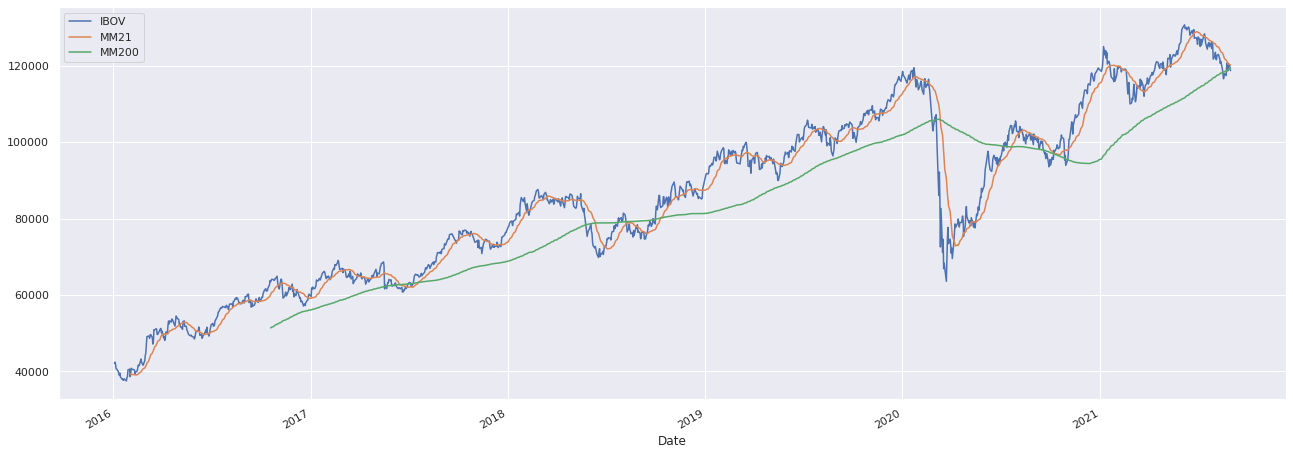

In [117]:
ibov["Close"].plot(figsize=(22,8), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend();

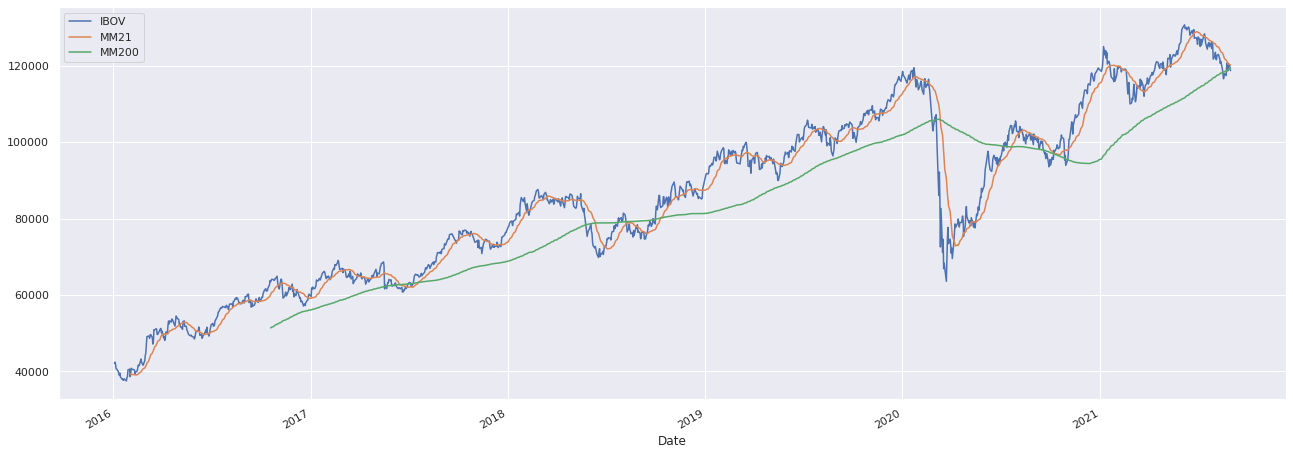

In [118]:
ibov_fatiado = ibov[(ibov.index.year >= 2016) & (ibov.index.year <= 2021)]
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend();

In [119]:
ibov_fatiado = ibov[ibov.index.month == 12]
ibov_fatiado.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-08,113590.0,114381.0,112820.0,113571.0,113571.0,8810900
2020-12-09,113799.0,114020.0,112567.0,112722.0,112722.0,8431100
2020-12-10,113002.0,115262.0,112732.0,114992.0,114992.0,11803600
2020-12-11,115128.0,115527.0,113949.0,115323.0,115323.0,8372300
2020-12-14,115137.0,115740.0,114431.0,114975.0,114975.0,8190900
2020-12-15,114613.0,116390.0,114613.0,116146.0,116146.0,8195100
2020-12-16,116149.0,118178.0,115496.0,117947.0,117947.0,9808100
2020-12-17,117864.0,119027.0,117856.0,118157.0,118157.0,7701400
2020-12-18,118395.0,119370.0,117639.0,117679.0,117679.0,8636000


In [120]:
ibov_fatiado = ibov[ibov.index.day == 21]
ibov_fatiado.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-21,99227.0,101240.0,99221.0,101202.0,101202.0,5969700
2019-10-21,104729.0,106027.0,104696.0,106022.0,106022.0,3504900
2019-11-21,105866.0,107497.0,105864.0,107497.0,107497.0,5819400
2020-01-21,118861.0,118861.0,117026.0,117026.0,117026.0,5085600
2020-02-21,114585.0,114585.0,112661.0,113681.0,113681.0,5896200
2020-05-21,81320.0,83309.0,81317.0,83027.0,83027.0,11395200
2020-07-21,104426.0,105449.0,103732.0,104310.0,104310.0,11105800
2020-08-21,101460.0,101566.0,100412.0,101521.0,101521.0,9100200
2020-09-21,98283.0,98283.0,95820.0,96991.0,96991.0,9738000


In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2016]
ibov_fatiado.tail(15)

##***Dados do site Vicente Guimarães***

https://vicenteguimaraes.penserico.com/dashboard.pr

In [122]:
url = "https://vicenteguimaraes.penserico.com/dashboard/cp.pr?e=VALE3"


In [123]:
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [124]:
dfs = pd.read_html(r.text)

In [125]:
df = pd.read_html(r.text,  decimal=',', thousands='.')[2]


In [ ]:
df

## **Quantstats**

In [127]:
qs.extend_pandas()

In [128]:
Vale = qs.utils.download_returns("vale3.sa")

In [ ]:
Vale.monthly_returns()

In [ ]:
Vale.plot_monthly_heatmap()

In [ ]:
dir(qs.stats)

In [ ]:
qs.reports.basic(Vale, benchmark="^BVSP");

In [ ]:
qs.reports.full(Vale, benchmark="^BVSP");

## **Simulando uma carteira de ações**

In [136]:
tickers = "VALE3.SA, ITUB4.SA, B3SA3.SA, PETR4.SA, BBDC4.SA, PETR3.SA, MGLU3.SA, ABEV3.SA, WEGE3.SA, SUZB3.SA, GNDI3.SA, ITSA4.SA, JBSS3.SA, NTCO3.SA, BBAS3.SA"
carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
carteira.dropna(inplace=True)
carteira

In [ ]:
ibov.dropna(inplace=True)
ibov

# **Resultado**

In [ ]:
sns.set()
carteira.plot(figsize=(18,8));

In [140]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

In [ ]:
carteira_normalizada.plot(figsize=(18,8));

In [142]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [ ]:
carteira_normalizada

In [ ]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

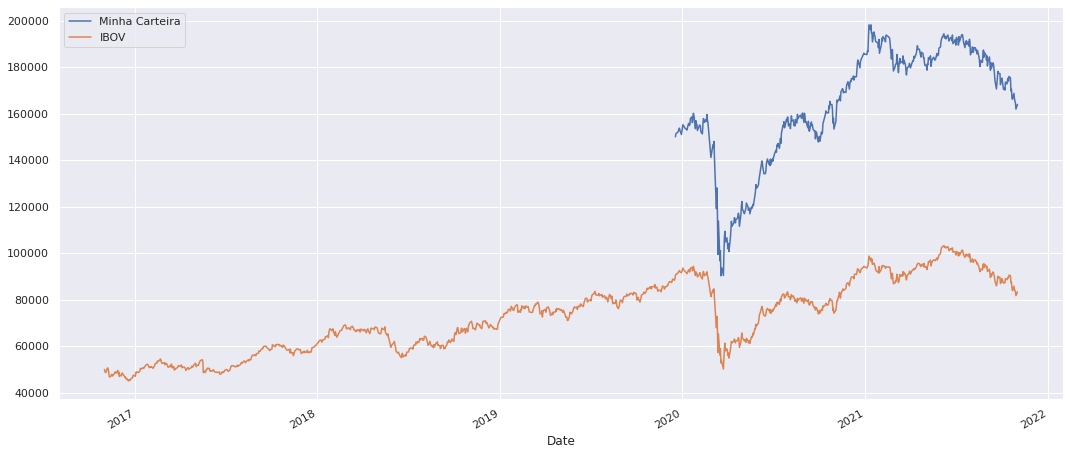

In [145]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [146]:
carteira_normalizada.describe()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,GNDI3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA,saldo
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,8265.359161,10820.057130,6957.324640,7240.377246,11266.638560,7893.995914,7848.025186,10483.341766,16058.572413,12692.787607,8077.118860,8236.593015,13110.898783,15614.137172,18974.308639,163539.536093
std,1204.832771,1676.350785,1181.461230,1239.602986,1907.484191,950.736661,1025.704169,2203.086435,4132.706178,2039.230850,1593.248178,1568.921700,2966.312074,5508.702520,4982.993702,25027.710283
min,5929.645619,6322.657900,4431.595988,4827.563502,5127.812884,5492.800137,5713.689048,6472.179981,5940.991422,5782.641027,3415.765051,3747.952359,6221.885527,6546.398516,7843.501442,90268.388813
25%,7223.899791,9382.441367,6275.773980,6237.543304,10130.108754,7200.067568,6987.641541,8721.053547,12057.923557,11521.280211,7079.581425,7196.834885,10360.753282,10633.578329,13681.124070,152134.343408
50%,8362.923447,11150.387395,6687.783789,7216.986174,11140.618541,7879.281904,7842.059200,9822.057784,17101.034708,13257.568601,7920.675991,8299.419476,12884.761436,15030.120328,20576.673780,168146.883055
75%,9164.840004,12015.727594,7095.662302,7908.464944,12757.386760,8550.420567,8637.921124,12104.913831,19387.949272,13845.402603,9536.008569,9622.280643,15129.517023,20462.721904,22564.406269,184257.906284
max,10866.960998,14148.384663,10624.013380,10632.232764,15582.418791,10272.010602,10429.104261,16471.081826,23171.075919,16614.483227,10642.279926,10791.895045,20010.108900,25001.230051,27450.568917,198144.323393


In [148]:
carteira_normalizada.plot_rolling_beta

<bound method rolling_beta of                 ABEV3.SA      B3SA3.SA  ...      WEGE3.SA          saldo
Date                                    ...                             
2019-12-18  10000.000000  10000.000000  ...  10000.000000  150000.000000
2019-12-19  10041.905720  10000.000000  ...   9911.503064  151368.626968
2019-12-20  10165.875883  10111.202997  ...   9997.048342  151539.189602
2019-12-23  10192.753410   9651.977536  ...   9978.809348  152013.841806
2019-12-26  10332.529031   9606.672564  ...  10291.846861  153749.343519
...                  ...           ...  ...           ...            ...
2021-10-26   8405.261422   8153.383365  ...  23862.592767  166471.552273
2021-10-27   8438.527861   8133.251733  ...  23585.820935  165266.727526
2021-10-28   9259.094563   8079.566953  ...  22761.521219  164450.206380
2021-10-29   9419.880678   7992.329027  ...  22262.126470  161920.592646
2021-11-01   9625.022750   8039.303049  ...  22238.058755  163937.000514

[460 rows x 16 colum

## **Salvando Dados em Excel**

In [149]:
ibov.to_excel('ibovteste1.xlsx')
files.download('ibovteste1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [150]:
ifix.to_excel('ifix.xlsx')
files.download('ifix.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Salvando Dados em CSV**





In [151]:
ibov.to_csv('ibovteste1.csv')
files.download('ibovteste1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [152]:
ifix.to_csv('ifix.csv')
files.download('ifix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Quantstats

In [153]:
qs.extend_pandas()

In [154]:
Vale = qs.utils.download_returns("vale3.sa")

In [155]:
Vale.monthly_returns()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,EOY
2000,0.142857,-0.150000,-0.019608,-2.220446e-16,0.045500,0.075801,-0.010891,0.038202,-0.089827,0.046373,-0.159091,0.256757,0.180191
2001,0.096774,-0.039216,0.010205,-2.020231e-02,0.067010,0.024154,-0.003773,-0.028409,-0.015595,0.049307,-0.065861,0.050505,0.156601
2002,-0.015384,0.205078,0.029174,1.417304e-02,0.179969,0.022503,0.068211,-0.096385,0.154667,0.108545,0.041667,0.029000,0.735544
2003,-0.059281,0.074380,-0.125000,-9.901091e-02,0.073302,-0.045454,0.225000,0.076774,0.056047,0.111016,-0.007692,0.313954,0.540850
2004,-0.079646,0.080128,-0.053353,-1.830610e-01,0.205664,-0.073897,0.126460,0.025015,0.146429,-0.049844,0.091804,0.133634,0.358583
2005,0.049006,0.142677,-0.060773,-1.941177e-01,0.021168,-0.009292,0.132612,0.033253,0.220715,-0.058889,0.027155,-0.002090,0.290630
2006,0.185236,-0.082075,0.016362,1.344706e-02,-0.015137,-0.007970,-0.033091,-0.090010,0.018478,0.155816,0.102863,0.066644,0.337247
2007,0.116170,0.019831,0.052269,1.009173e-01,0.035952,-0.009653,0.076816,0.045043,0.277583,0.049233,-0.035385,-0.054067,0.698498
2008,-0.126117,0.131777,0.031367,9.275264e-02,-0.001980,-0.123798,-0.175261,-0.081749,-0.159190,-0.218928,-0.030292,0.005812,-0.523015
2009,0.173709,-0.050154,0.004211,1.811348e-01,0.053769,-0.092583,0.073913,-0.009986,0.122955,0.099457,0.094196,0.013056,0.713925


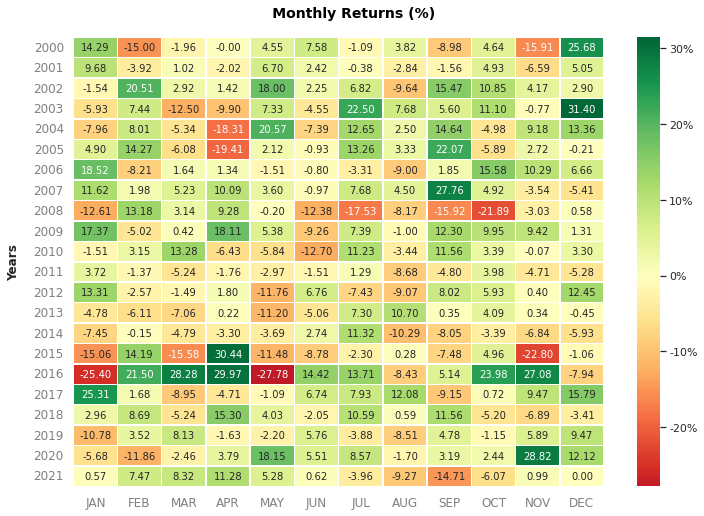

In [156]:
Vale.plot_monthly_heatmap()

In [157]:
dir(qs.stats)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_ceil',
 '_linregress',
 '_norm',
 '_np',
 '_pd',
 '_sqrt',
 '_utils',
 'adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',

[Performance Metrics]

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2000-01-03  2000-01-03
End Period          2021-11-01  2021-11-01
Risk-Free Rate      0.0%        0.0%
Time in Market      96.0%       99.0%

Cumulative Return   3,777.66%   523.46%
CAGR﹪              18.23%      8.74%

Sharpe              0.62        0.44
Sortino             0.91        0.62
Sortino/√2          0.65        0.44
Omega               1.12        1.12

Max Drawdown        -83.84%     -59.96%
Longest DD Days     3642        3400

Gain/Pain Ratio     0.12        0.08
Gain/Pain (1M)      0.72        0.45

Payoff Ratio        1.08        0.98
Profit Factor       1.12        1.08
Common Sense Ratio  1.23        1.05
CPC Index           0.61        0.55
Tail Ratio          1.11        0.97
Outlier Win Ratio   3.27        4.69
Outlier Loss Ratio  2.99        4.2

MTD                 0.99%       1.98%
3M                  -26.6%      -13.34%
6M          

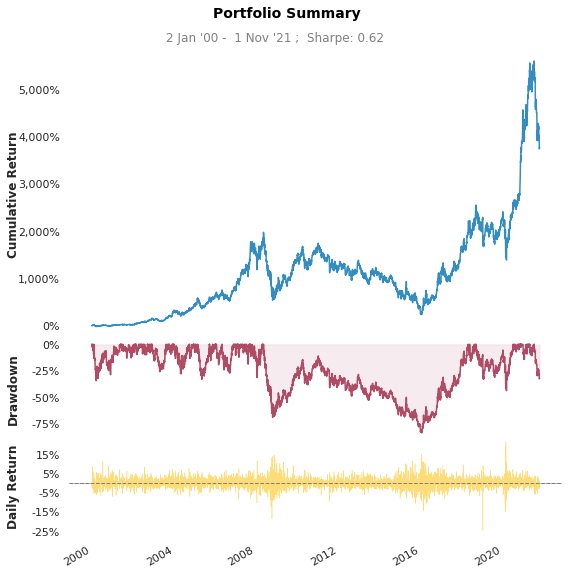

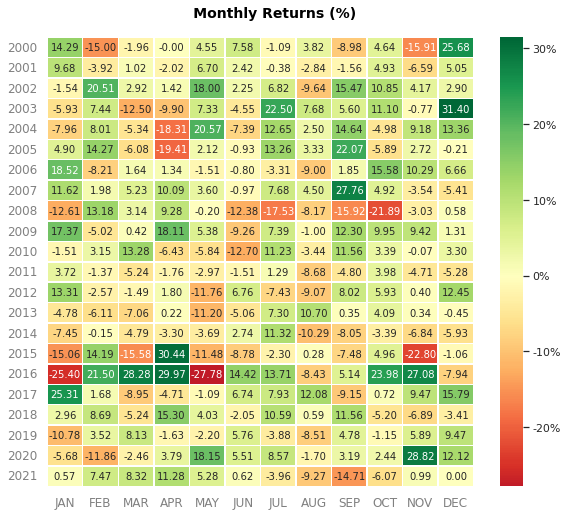

In [158]:
qs.reports.basic(Vale, benchmark="^BVSP");

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2000-01-03  2000-01-03
End Period                 2021-11-01  2021-11-01
Risk-Free Rate             0.0%        0.0%
Time in Market             96.0%       99.0%

Cumulative Return          3,777.66%   523.46%
CAGR﹪                     18.23%      8.74%

Sharpe                     0.62        0.44
Smart Sharpe               0.61        0.43
Sortino                    0.91        0.62
Smart Sortino              0.9         0.62
Sortino/√2                 0.65        0.44
Smart Sortino/√2           0.64        0.44
Omega                      1.12        1.12

Max Drawdown               -83.84%     -59.96%
Longest DD Days            3642        3400
Volatility (ann.)          40.87%      28.32%
R^2                        0.39        0.39
Calmar                     0.22        0.15
Skew                       0.12        -0.14
Kurtosis        

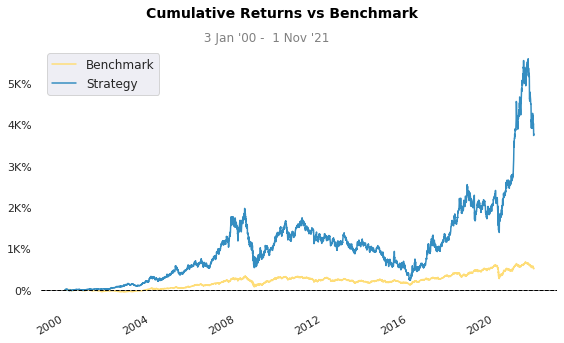

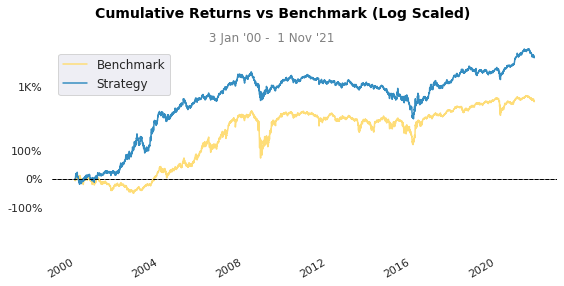

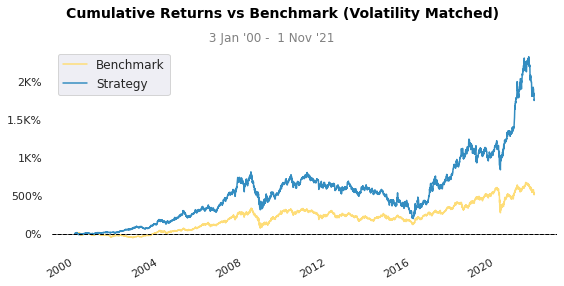

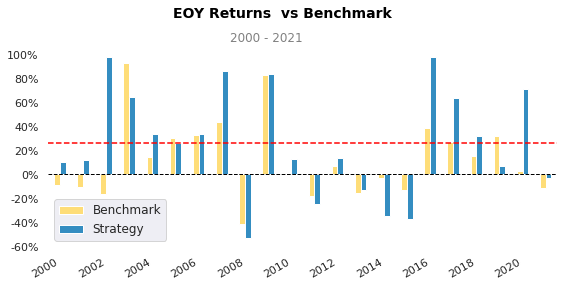

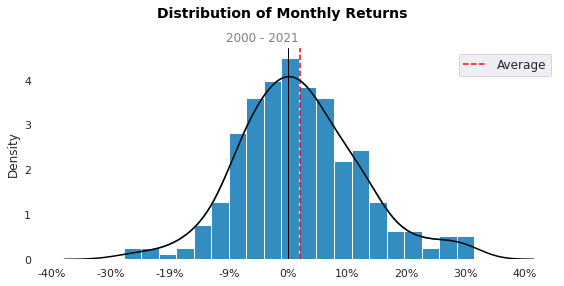

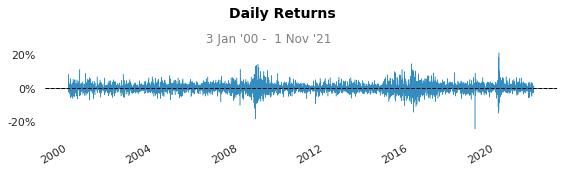

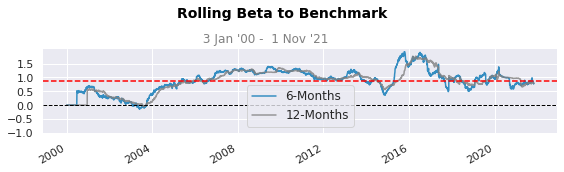

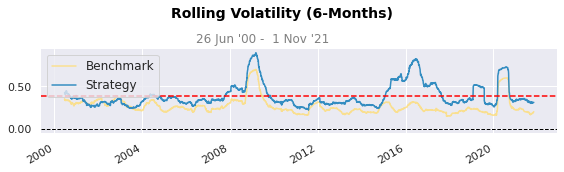

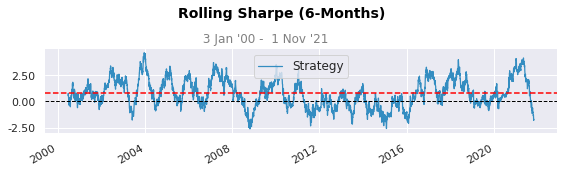

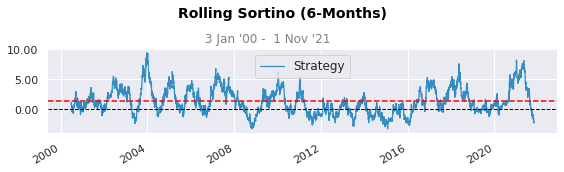

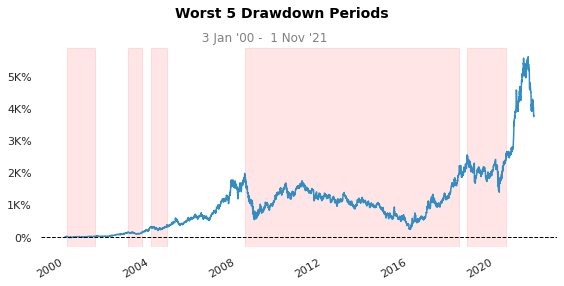

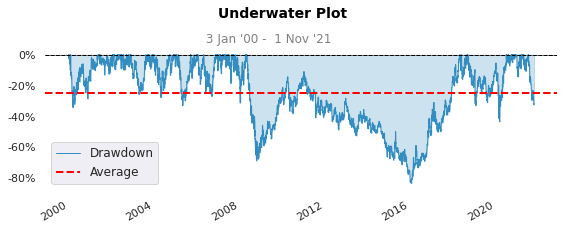

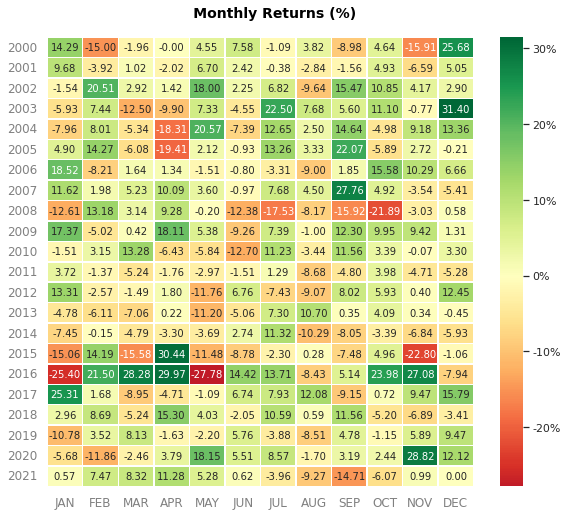

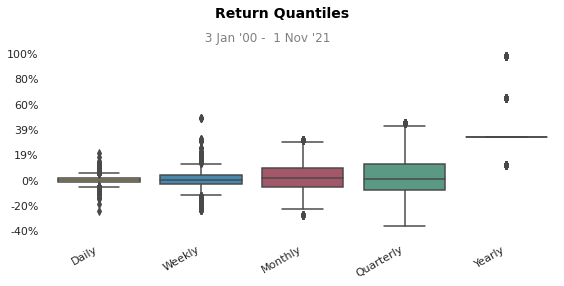

In [159]:
qs.reports.full(Vale, benchmark="^BVSP");